In [2]:
# Python 3.
from concurrent import futures
import datetime
import itertools
import time
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

WORKERS=5
ITERS=15

def test_multithreading(Executor, function):
    start_time = datetime.datetime.now()
    with Executor(max_workers=WORKERS) as ex:
        result = list(ex.map(function, itertools.repeat(start_time, ITERS)))

    start, stop = np.array(result).T
    return start, stop

def idle(start_time):
    elapsed = lambda: (datetime.datetime.now() - start_time).total_seconds()
    start = elapsed()
    time.sleep(2)
    stop = elapsed()
    return (start, stop)

def busy(start_time):
    elapsed = lambda: (datetime.datetime.now() - start_time).total_seconds()
    start = elapsed()
    sum(range(10**7))
    stop = elapsed()
    return (start, stop)

def plot(start, stop, title):
    elapsed = stop - start
    plt.barh(range(len(start)), elapsed, left=start)
    plt.ylabel("Task number")
    plt.xlabel("Seconds")
    plt.grid(axis='x')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.savefig("{}.svg".format(title.replace(" ", "-")))

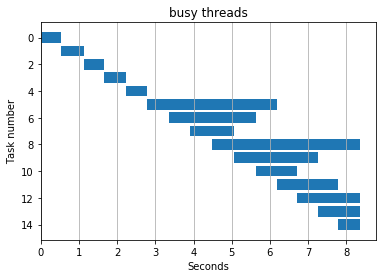

In [5]:
plot(*test_multithreading(futures.ThreadPoolExecutor, busy), title="busy threads")

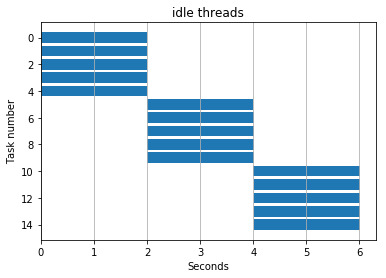

In [6]:
plot(*test_multithreading(futures.ThreadPoolExecutor, idle), title="idle threads")

Exception in thread Thread-7:
Traceback (most recent call last):
  File "C:\apps\Anaconda3\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\apps\Anaconda3\lib\threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "C:\apps\Anaconda3\lib\concurrent\futures\process.py", line 295, in _queue_management_worker
    shutdown_worker()
  File "C:\apps\Anaconda3\lib\concurrent\futures\process.py", line 253, in shutdown_worker
    call_queue.put_nowait(None)
  File "C:\apps\Anaconda3\lib\multiprocessing\queues.py", line 129, in put_nowait
    return self.put(obj, False)
  File "C:\apps\Anaconda3\lib\multiprocessing\queues.py", line 83, in put
    raise Full
queue.Full



BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.